In [1]:
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-32e1f2dc-25bb-741c-97ec-20e254c218ef)


In [2]:
%%capture
!pip install opensimplex imageio-ffmpeg

In [3]:
%%capture
import os
!pip install gdown --upgrade

%cd "/content/"
!mkdir colab-sg2-ada-pytorch
%cd colab-sg2-ada-pytorch
!git clone https://github.com/dvschultz/stylegan2-ada-pytorch
%cd stylegan2-ada-pytorch
!mkdir downloads
!mkdir datasets
!mkdir pretrained
!gdown --id 1-5xZkD8ajXw1DdopTkH_rAoCsD72LhKU -O /content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/pretrained/wikiart.pkl

In [4]:
%%capture
!pip uninstall jax jaxlib -y
!pip install "jax[cuda11_cudnn805]==0.3.10" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
!pip uninstall torch torchvision -y
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html
!pip install timm==0.4.12 ftfy==6.1.1 ninja==1.10.2

You probably don’t need to run this, but this will update your repo to the latest and greatest.

In [5]:
%cd "/content/colab-sg2-ada-pytorch/stylegan2-ada-pytorch"
!git config --global user.name jujemu
!git config --global user.email jujemu30@gmail.com
!git fetch origin
!git pull
!git stash
!git checkout origin/main -- train.py generate.py legacy.py closed_form_factorization.py flesh_digression.py apply_factor.py README.md calc_metrics.py training/stylegan2_multi.py training/training_loop.py util/utilgan.py

/content/colab-sg2-ada-pytorch/stylegan2-ada-pytorch
Already up to date.
No local changes to save


In [2]:
import shutil

path_pretrained = '/content/drive/MyDrive/Colab Notebooks/AiffelThon/jemu/stylegan2_face_test/afhqcat.pkl'
shutil.copy(path_pretrained, '/content')

'/content/afhqcat.pkl'

In [3]:
%cd '/content/colab-sg2-ada-pytorch/stylegan2-ada-pytorch'
# !python generate.py --help

/content/colab-sg2-ada-pytorch/stylegan2-ada-pytorch


In [4]:
!rm -rf /content/output & mkdir /content/output
%cd /content/colab-sg2-ada-pytorch/stylegan2-ada-pytorch
!python generate.py --outdir=/content/output --trunc=0.7 --seeds=2022-2025 \
      --network=/content/afhqcat.pkl

/content/colab-sg2-ada-pytorch/stylegan2-ada-pytorch
Loading networks from "/content/afhqcat.pkl"...
Generating image for seed 2022 (0/4) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 2023 (1/4) ...
Generating image for seed 2024 (2/4) ...
Generating image for seed 2025 (3/4) ...


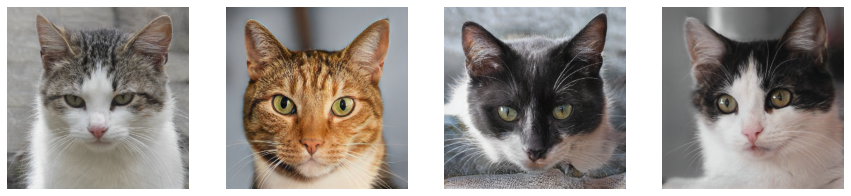

In [5]:
# img size is (512, 512)
from PIL import Image
import os
import glob
import matplotlib.pyplot as plt

path_output = '/content/output'
list_imgs = glob.glob(os.path.join(path_output, '*.png'))

_, ax = plt.subplots(1, 4, figsize=(15, 6))
for idx, img in enumerate(list_imgs):
  img = Image.open(img)
  ax[idx].imshow(img)
  ax[idx].axis(False)
plt.show()

In [6]:
# Help: Get a latent vector from target image
# !python /content/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/projector.py --help

In [7]:
def project(num):
  path = '/content/project/' + str(num)
  !mkdir {path}
  !python /content/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/projector.py \
      --outdir={path} --target={list_imgs[num]} \
      --network=/content/afhqcat.pkl

In [8]:
%%capture
!rm -rf /content/project & mkdir /content/project
%cd /content/colab-sg2-ada-pytorch/stylegan2-ada-pytorch

# Set the the number of projecting images
num = 2 

for n in range(num):
  project(n)

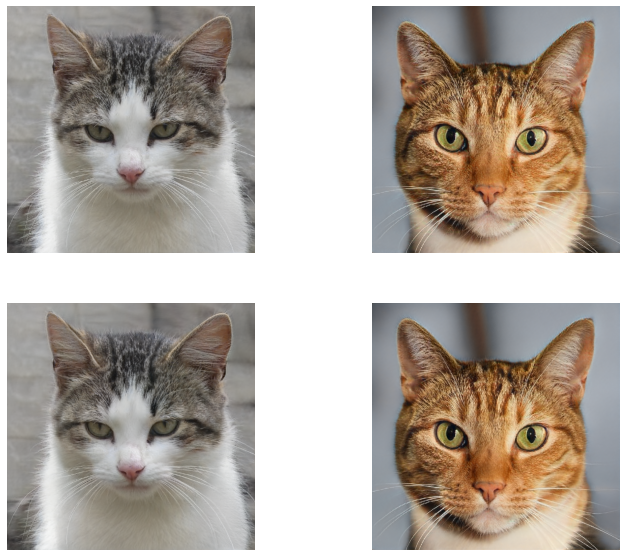

In [9]:
# Real is left
# Right is fake
_, ax = plt.subplots(2, 2, figsize=(12, 10))

for idx, img in enumerate(glob.iglob(os.path.join('/content/project', '**/proj.png'))):
  img = Image.open(img)
  ax[1, idx].imshow(img)
  ax[1, idx].axis(False)
for idx, img in enumerate(glob.iglob(os.path.join('/content/project', '**/target.png'))):
  img = Image.open(img)
  ax[0, idx].imshow(img)
  ax[0, idx].axis(False)
plt.show()

In [10]:
%cd /content/project
import numpy as np

file_name = 'projected_w.npz'
latents = []
for i in range(num):
  latents.append(np.load(os.path.join(str(i), file_name)))

/content/project


In [11]:
latents[0]['w'].shape

(1, 16, 512)

In [12]:
# !python /content/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/style_mixing.py --help

In [13]:
!python /content/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/style_mixing.py \
        --outdir=out --rows=2022,2023 --cols=2024,2025 \
        --network=/content/afhqcat.pkl

Loading networks from "/content/afhqcat.pkl"...
Generating W vectors...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Generating images...
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating style-mixed images...
Saving images...
Saving image grid...
